In [18]:
# ██████╗  ██████╗  ███╗   ██╗ ███████╗ ██╗  ██████╗  ██╗   ██╗ ██████╗   █████╗  ████████╗ ██╗  ██████╗  ███╗   ██╗ 
#██╔════╝ ██╔═══██╗ ████╗  ██║ ██╔════╝ ██║ ██╔════╝  ██║   ██║ ██╔══██╗ ██╔══██╗ ╚══██╔══╝ ██║ ██╔═══██╗ ████╗  ██║ 
#██║      ██║   ██║ ██╔██╗ ██║ █████╗   ██║ ██║  ███╗ ██║   ██║ ██████╔╝ ███████║    ██║    ██║ ██║   ██║ ██╔██╗ ██║ 
#██║      ██║   ██║ ██║╚██╗██║ ██╔══╝   ██║ ██║   ██║ ██║   ██║ ██╔══██╗ ██╔══██║    ██║    ██║ ██║   ██║ ██║╚██╗██║ 
#╚██████╗ ╚██████╔╝ ██║ ╚████║ ██║      ██║ ╚██████╔╝ ╚██████╔╝ ██║  ██║ ██║  ██║    ██║    ██║ ╚██████╔╝ ██║ ╚████║ 
# ╚═════╝  ╚═════╝  ╚═╝  ╚═══╝ ╚═╝      ╚═╝  ╚═════╝   ╚═════╝  ╚═╝  ╚═╝ ╚═╝  ╚═╝    ╚═╝    ╚═╝  ╚═════╝  ╚═╝  ╚═══╝ 
# global variables that are chagned often

#█▀▀ █▀▀ █▄ █ █▀▀ █▀█ ▄▀█ █   
#█▄█ ██▄ █ ▀█ ██▄ █▀▄ █▀█ █▄▄ 
#
#variable for skipping all the plotting code for debugging processing
plotting = True

#chose while taxi types to be processed
process_ywl = True
process_grn = True
process_fhv = True
process_hvf = False   #setting this to true adds 24hr processing

#limits data size and processes to be quicker (for testing only) 
testing = False
start_month = 3        #testing var default 2
number_of_months = 5   #testing var default 11
start_day = 60         #testing var default 32ish
number_of_days = 100     #testing var default 366


#█▀▄ ▄▀█ ▀█▀ ▄▀█    █▀▄ █ █▀█ 
#█▄▀ █▀█  █  █▀█    █▄▀ █ █▀▄ 
#

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#intermediate file names
processed_data_file = "_processed_data_"
tally_s1_file = "taxi_data_tallyed_s1.csv"
tally_s2_file = "taxi_data_tallyed_s2_neg.csv"

In [19]:
#█▀█ █   █▀█ ▀█▀ ▀█▀ █ █▄ █ █▀▀    █   █ █▄▄ █▀ 
#█▀▀ █▄▄ █▄█  █   █  █ █ ▀█ █▄█    █▄▄ █ █▄█ ▄█ 
# #setting up libs

import numpy as np
from scipy.stats import entropy
from math import e

from collections import OrderedDict

import random as random
np.random.seed(1)
from pprint import pprint

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.show() 
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.show() 
plt.rcParams.update({'font.size': 22})

plt.rcParams['axes.grid'] = False

from scipy.stats import mode, chi2_contingency, pearsonr 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import datasets
from sklearn import svm

import warnings

warnings.filterwarnings("ignore")

In [20]:
# ██████╗  ██╗       ██████╗  ██████╗   █████╗  ██╗         ██╗   ██╗  █████╗  ██████╗  ███████╗ 
#██╔════╝  ██║      ██╔═══██╗ ██╔══██╗ ██╔══██╗ ██║         ██║   ██║ ██╔══██╗ ██╔══██╗ ██╔════╝ 
#██║  ███╗ ██║      ██║   ██║ ██████╔╝ ███████║ ██║         ██║   ██║ ███████║ ██████╔╝ ███████╗ 
#██║   ██║ ██║      ██║   ██║ ██╔══██╗ ██╔══██║ ██║         ╚██╗ ██╔╝ ██╔══██║ ██╔══██╗ ╚════██║ 
#╚██████╔╝ ███████╗ ╚██████╔╝ ██████╔╝ ██║  ██║ ███████╗     ╚████╔╝  ██║  ██║ ██║  ██║ ███████║ 
# ╚═════╝  ╚══════╝  ╚═════╝  ╚═════╝  ╚═╝  ╚═╝ ╚══════╝      ╚═══╝   ╚═╝  ╚═╝ ╚═╝  ╚═╝ ╚══════╝ 
# v2.2.1
# global variabels which can be tweeked

#█    ▀  █▀▀▄ █▀▀█ █▀▀█ █▀▀█ █  █ █▀▀ 
#█   ▀█▀ █▀▀▄ █▄▄▀ █▄▄█ █▄▄▀ █▄▄█ ▀▀█ 
#▀▀▀ ▀▀▀ ▀▀▀  ▀ ▀▀ ▀  ▀ ▀ ▀▀ ▄▄▄█ ▀▀▀ 
# imporint libarys used throughout

import time
import datetime

import pandas as pd
from numpy import log, sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from math import e

import os.path
from os.path import getsize
from urllib.request import urlretrieve

from pyspark.sql.functions import rand 
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

import warnings

#variable for skipping all the plotting code for debugging processing
start_time = time.perf_counter()
start_time_og = time.perf_counter()


#▀█▀ ▄▀█ ▀▄▀ █    █▀▄ ▄▀█ ▀█▀ ▄▀█ 
# █  █▀█ █ █ █    █▄▀ █▀█  █  █▀█ 
#

#file location
file_base = "_tripdata_"

#indexs for each of the main data set types
ywl_i = 0 
grn_i = 1
fhv_i = 2
hvf_i = 3

#used to identify which taxis to process
process_taxi = [process_ywl, process_grn, process_fhv, process_hvf]

#names related to each cab type in order
taxi_file_names = ["yellow","green","fhv","fhvhv"]
full_names = ["yellow cabs", "green cabs", "for higher vheciles", "for higher high volume"]

#column names for each cab type in order
column_names = [
    ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
    ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
    ['dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag'],
    ['hvfhs_license_num', 'dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag']
]

#2018 fhv files which was giving me trouble so added this schema for it
bad_fhv_schema = [2, 2018, ['Pickup_DateTime','DropOff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag','dispatching_base_number']]


#aliases for pickup time and dropoff time
pickup_time = ['tpep_pickup_datetime','lpep_pickup_datetime','pickup_datetime','pickup_datetime','Pickup_DateTime']
dropoff_time = ['tpep_dropoff_datetime','lpep_dropoff_datetime','dropoff_datetime','dropoff_datetime','DropOff_datetime']

#irrelavent collumns that can be dropped
irrelavent_columns = ['dispatching_base_number','DOtime','hvfhs_license_num','dispatching_base_num','VendorID','store_and_fwd_flag','extra','MTA_tax','improvement_surcharge','tip_amount','tolls_amount', 'ehail_fee', 'improvement_surcharge', 'congestion_surcharge']

#array, for all the taxi count colls
all_taxi_cols = [
        "2019_night", 
        "2019_morn",
        "2019_arvo",
        "2019_even",
        "2020_night", 
        "2020_morn",
        "2020_arvo",
        "2020_even"
        ]

#array for 2020 taxi count colls
taxi_cols_2020 = [
        "2020_night", 
        "2020_morn",
        "2020_arvo",
        "2020_even"]


#▀█▀ ▄▀█ ▀▄▀ █    █   █▀█ █▀▀ ▄▀█ ▀█▀ █ █▀█ █▄ █ █▀ 
# █  █▀█ █ █ █    █▄▄ █▄█ █▄▄ █▀█  █  █ █▄█ █ ▀█ ▄█ 
#

#location processing variables
#locations that will be removed as considered invalid
bad_locations = [1,132,138,264,265]

#location of the location id file
location_file = "taxi+_zone_lookup.csv"

#list of boroughs names as in the location file
boroughs_locations = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"]



#█▀▄ █▀█ █ █ █ █▄ █ █   █▀█ ▄▀█ █▀▄ 
#█▄▀ █▄█ ▀▄▀▄▀ █ ▀█ █▄▄ █▄█ █▀█ █▄▀ 
#

#download directory 
download_dir = data_dir

#taxi data base url
taxi_url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/"

#covid cases
covid_url = "https://data.cityofnewyork.us/api/views/rc75-m7u3/rows.csv?accessType=DOWNLOAD"
    
#location data
location_url = "https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv"

#█▀▄ ▄▀█ ▀█▀ █▀▀    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▀ █▀█  █  ██▄    █▄▀ ██▄ █▀  ▄█ 
#
months_in_year = 12

#years of data used
years = [2019, 2020]

#feb 2019 was when fhvhv file started
fhvhv_started = [2,2019] 

#late feb 2020 was when the first case of covid was observed in NYC
covid_started = [2,2020] 

#preprocessing arrays

#hours each day to seperate each count
day_time_breakdown = [0,6,12,18]

#day of the year covid started on
covid_start_day = int(datetime.datetime.strptime(
    " ".join([str(int) for int in covid_started]), 
    "%m %Y").__format__("%j"))

#pretty self explanitory
days_in_2020 = 366



#█▀█ █ █ ▀█▀ █   █ █▀▀ █▀█ █▀ 
#█▄█ █▄█  █  █▄▄ █ ██▄ █▀▄ ▄█ 
# values for calculating outliers

#all vals must be withing the .99 percent of data
outlier_percent = (1-.99)/2

#buffer for graphing and removing outliers from graphs
fare_amount_graph_buffer = 15

#accuracy when calculating the percentile
percentile_accuracy = 0.00001



#█▀▀ █▀█ █ █ █ █▀▄    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▄ █▄█ ▀▄▀ █ █▄▀    █▄▀ ██▄ █▄▄ ▄█ 
#

#files
covid_restrictions_file = "covid_restrictions.csv"
covid_cases_file = "COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv"

#list of boroughs as named in the covid file (same order)
covid_boroughs =["bx","bk","mn","qn","si"]



#█▀ █▀▀ ▀█▀ █ █ █▀█    █▀▀ █▀█ █▄ █ █▀▄ █ ▀█▀ █ █▀█ █▄ █ █▀ 
#▄█ ██▄  █  █▄█ █▀▀    █▄▄ █▄█ █ ▀█ █▄▀ █  █  █ █▄█ █ ▀█ ▄█ 
#

#plotting is using a yellow data set so must skip plotting if no yellow
if plotting:
    if not (process_taxi[ywl_i] and process_taxi[grn_i]):
        plotting = False
        
        
#if in a testing mode, sets up variables so file processes correctly         
if testing:
    
    #changes the download dir to not overwrite data
    download_dir =  data_dir.split("1/Data/")[0] + "1/TestDownload/"
    
    #changes some timing variabels to anaylise only what is needed for testing
    covid_started[0] = start_month
    months_in_year = start_month + number_of_months - 1
    graph_month = start_month
    days_in_2020 = start_day + number_of_days
else:
    
    #if not testing graphing month is 5 (so may)
    graph_month = 5
    
    
    
#█▀▄▀█ █ █▀ █▀▀    █▀▀ █ █ █▄ █ █▀▀ 
#█ ▀ █ █ ▄█ █▄▄    █▀  █▄█ █ ▀█ █▄▄ 
# specialized functions

#sets seed for when its used
seed = 1

# log function to deal with integer count data, added conditions to set any negative
# or 0 values to be 0
def logf(x):
    return (log(x) if x > 0 else 0)

#applys a log log others 0
def loglogf(x):
    return (log(log(x)) if x > e else 0)

#applys log log to an array
def loglogfa(arr):
    return [loglogf(x) for x in arr]

In [21]:
#█▀▀ ▄▀█ █▀ █▀▀ █▀ 
#█▄▄ █▀█ ▄█ ██▄ ▄█ 
# #importing covid case data
covid_cases = pd.read_csv(data_dir + covid_cases_file)

#makes the names of columns lowercase
covid_cases.columns = covid_cases.columns.str.lower()

#makes the date column datetime object
covid_cases['date_of_interest'] = covid_cases['date_of_interest']\
    .transform(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

#renaming some badly named columns
covid_cases['probable_death_count'] = covid_cases['death_count_probable']
covid_cases['hospitalized_count_7day_avg'] = covid_cases['hosp_count_7day_avg']
covid_cases = covid_cases.drop(['death_count_probable','hosp_count_7day_avg'],axis=1)

In [22]:

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#list of boroughs names as in the location file
boroughs = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]

df = pd.read_csv(data_dir + tally_s2_file)
df

,Unnamed: 0,day_year,day_week,week,borough,fhv,2019_night,2019_morn,2019_arvo,2019_even,...,borough_case_count_7day_avg,borough_all_case_count_7day_avg,borough_hospitalized_count_7day_avg,borough_death_count_7day_avg,borough_all_death_count_7day_avg,stadium_capcity,restaurants,high_schools,indoor_religious,phase_1
0,0,32,6,4,0,0,1.676556,1.860428,1.884553,1.810529,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,1,32,6,4,0,1,2.293099,2.309731,2.338324,2.366162,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,2,32,6,4,1,0,2.112605,2.052718,2.136567,2.166455,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3,3,32,6,4,1,1,2.394665,2.390935,2.436074,2.467458,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
4,4,32,6,4,2,0,2.374448,2.400022,2.454497,2.454562,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,3315,363,1,52,2,1,2.340907,2.421726,2.470082,2.459379,...,1.806491,1.847767,1.276345,0.475885,0.475885,0.0,0.0,0.0,0.5,1.0
3316,3316,363,1,52,3,0,1.835632,1.893093,1.969277,1.995207,...,1.912448,1.948918,1.449898,0.834032,0.834032,0.0,0.0,0.0,0.5,1.0
3317,3317,363,1,52,3,1,2.297639,2.370983,2.391751,2.381531,...,1.912448,1.948918,1.449898,0.834032,0.834032,0.0,0.0,0.0,0.5,1.0
3318,3318,363,1,52,4,0,0.000000,0.583198,0.000000,0.094048,...,1.739366,1.774470,1.061385,0.475885,0.475885,0.0,0.0,0.0,0.5,1.0


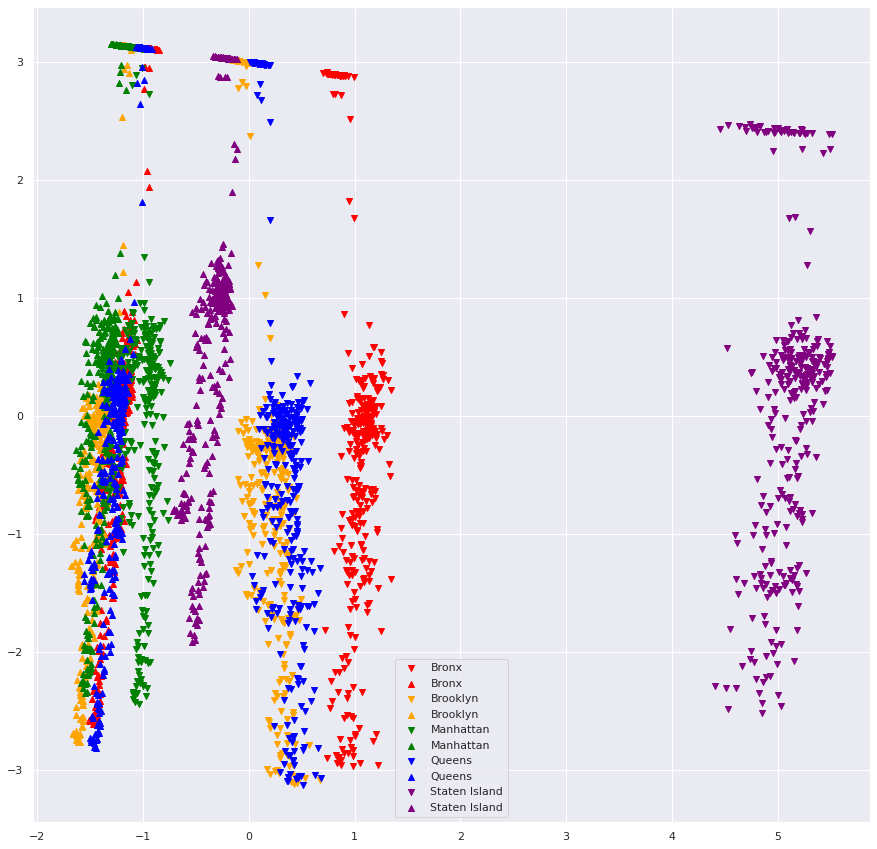

In [27]:
#showing low accuracies from the clustering point of view

#sets up and fits the PCA algorithm with 2 dimensions 
pca = PCA(n_components = 2)
s = pca.fit_transform(df[df.columns.difference(['Unnamed: 0', 'day_year', 'day_week', 'week', 'borough', 'fhv']).tolist()])

#creating colour scheme with each colour below representing its respective class label
colours = ["red", "orange", "green", "blue", "purple"]
shapes = ["v" , "^"] #up then down
labels = boroughs

#plotting each class
for borough, colour, label in zip(np.unique(df["borough"]), colours, labels):
    for fhv, shape in zip(np.unique(df["fhv"]), shapes):
        plt.scatter(
            s[(df["borough"] == borough) & (df["fhv"] == fhv), 0], 
            s[(df["borough"] == borough) & (df["fhv"] == fhv), 1],
            label=label, 
            c=colour,
            marker = shape
        )
    
#printing the plot
plt.legend()
plt.grid()
plt.show()


In [24]:
df.columns

Index(['Unnamed: 0', 'day_year', 'day_week', 'week', 'borough', 'fhv',
       '2019_night', '2019_morn', '2019_arvo', '2019_even', '2020_night',
       '2020_morn', '2020_arvo', '2020_even', 'borough_case_count',
       'borough_probable_case_count', 'borough_hospitalized_count',
       'borough_death_count', 'borough_probable_death_count',
       'borough_case_count_7day_avg', 'borough_all_case_count_7day_avg',
       'borough_hospitalized_count_7day_avg', 'borough_death_count_7day_avg',
       'borough_all_death_count_7day_avg', 'stadium_capcity', 'restaurants',
       'high_schools', 'indoor_religious', 'phase_1'],
      dtype='object')

In [37]:

#function used top plot graphs
def plot_these_cols(graphing_cols, ax, ax2): 
    
    #adds grid back
    ax.grid(True)   
    ax2.grid(True)
        
    dft = df.loc[(df["borough"] == 3) & ( df["fhv"] == 1)]
    
    #sets x ticks to be days of the year in order, just need one set so limits borough and fhv to 1 set
    xticks = dft["day_year"]
    
    #sets x tick labels and such to be the days of the year
    ax.set_xticklabels = xticks
    ax.set_xticks = xticks
    
    #plots the first graph in green
    lns1 = ax.plot(xticks, dft[[graphing_cols[0]]], color = 'green', label = graphing_cols[0])
    ax.tick_params(axis='y', labelcolor='green')
    
    #plots the second graph in blue
    lns2 = ax2.plot(xticks, dft[[graphing_cols[1]]], color = 'blue', label = graphing_cols[1])
    ax2.tick_params(axis='y', labelcolor='blue')

    #combines the legend
    lns = lns1 + lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    
    #makes everything a larger font    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    
    #more font size increases
    for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(20)





In [38]:
dfs

2020_arvo           2020_night            \
fhv              0         1          0         1   
day_year                                            
32        1.954755  2.399619   1.986356  2.349561   
33        1.966330  2.397318   1.966551  2.365077   
34        1.925498  2.371567   1.791995  2.293531   
35        1.925345  2.370581   1.814454  2.252880   
36        1.939957  2.375057   1.833808  2.258470   
...            ...       ...        ...       ...   
359       1.776781  2.387767   1.336753  2.252826   
360       1.621879  2.348997   1.268453  2.331074   
361       1.708642  2.352611   1.169032  2.275082   
362       1.675663  2.338676   1.251765  2.273065   
363       1.742294  2.346609   1.214110  2.222877   

         borough_hospitalized_count_7day_avg            
fhv                                        0         1  
day_year                                                
32                                  0.000000  0.000000  
33                                  0.000000  0.000000  
34                                  0.000000  0.000000  
35                                  0.000000  0.000000  
36                                  0.000000  0.000000  
...                                      ...       ...  
359                                 1.439718  1.439718  
360                                 1.439718  1.439718  
361                                 1.446565  1.446565  
362                                 1.443172  1.443172  
363                                 1.449898  1.449898  

[332 rows x 6 columns]

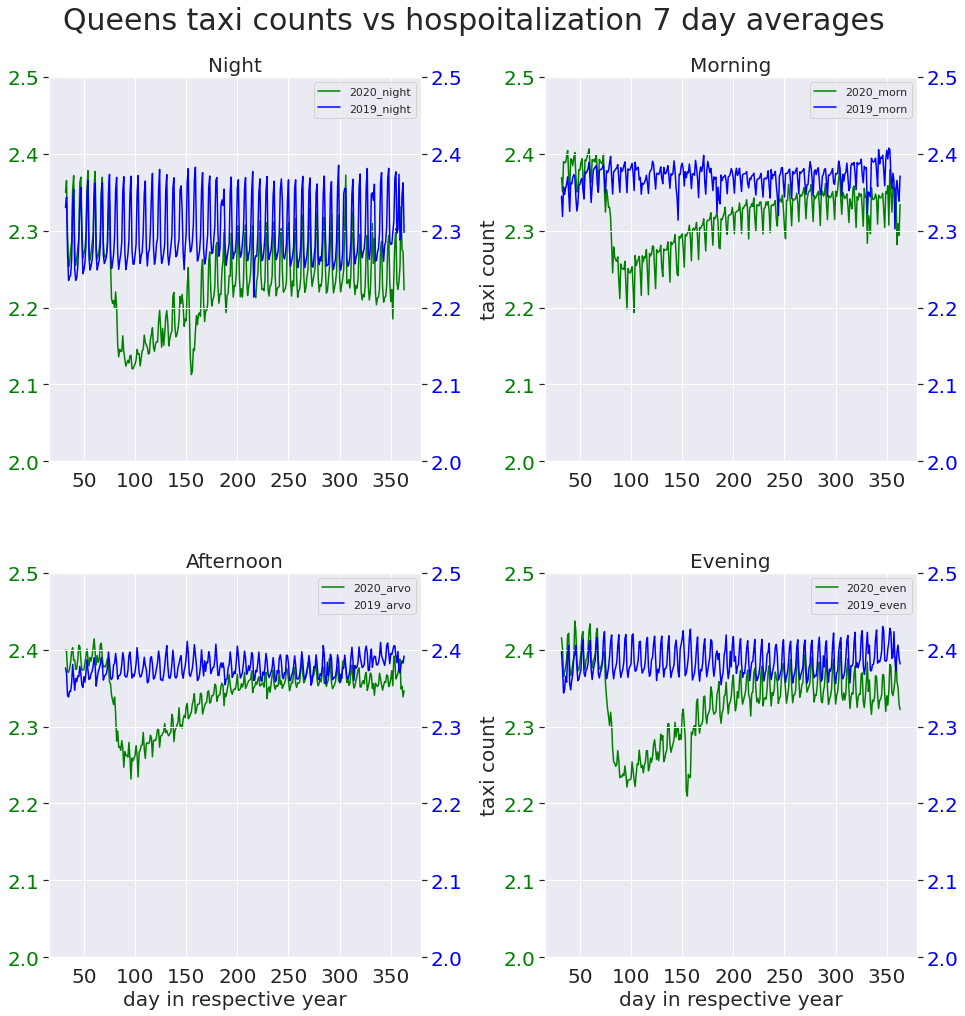

In [41]:

#pivots data to extract the right values for plotting
dfs = df[df["borough"] == 3].pivot(
    index = 'day_year', 
    columns = ['fhv'], 
    values = ['2020_arvo','2020_night', 'borough_hospitalized_count_7day_avg']
)

#creates 4 sub plots
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=4.0)
fig.suptitle("Queens taxi counts vs hospoitalization 7 day averages\n", fontsize = 30)

#y axis scales
y1_scale = [[2,2.5],[2,2.5],[2,2.5],[2,2.5]]
y2_scale = [[2,2.5],[2,2.5],[2,2.5],[2,2.5]]

#sub title names
sub_title = ["Night", "Morning", "Afternoon", "Evening"]

#for each part of the day
for i in range(0, len(taxi_cols_2020)):
        
        #sets the columns for the give day
        col_2020 = all_taxi_cols[i + len(taxi_cols_2020)]
        col_2019 = all_taxi_cols[i]
        
        #gets the sub plot axes
        ax = axs[i//2, i%2]
        ax2 = ax.twinx()
        
        #creates a scatter subplot
        plot_these_cols([col_2020, col_2019], ax, ax2)
        
        #sets y limit
        ax.set_ylim(y1_scale[i])
        ax2.set_ylim(y2_scale[i])
        
        #adds sub title
        ax.set_title(sub_title[i], fontsize = 20)
        
        #for certain sub graphs adds the x and y labels
        if i//2 == 1:
            ax.set(xlabel='day in respective year')
            
        if i%2 == 1:
            ax.set(ylabel='taxi count')

        
#fixes font sizes
for ax in axs.flat:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)



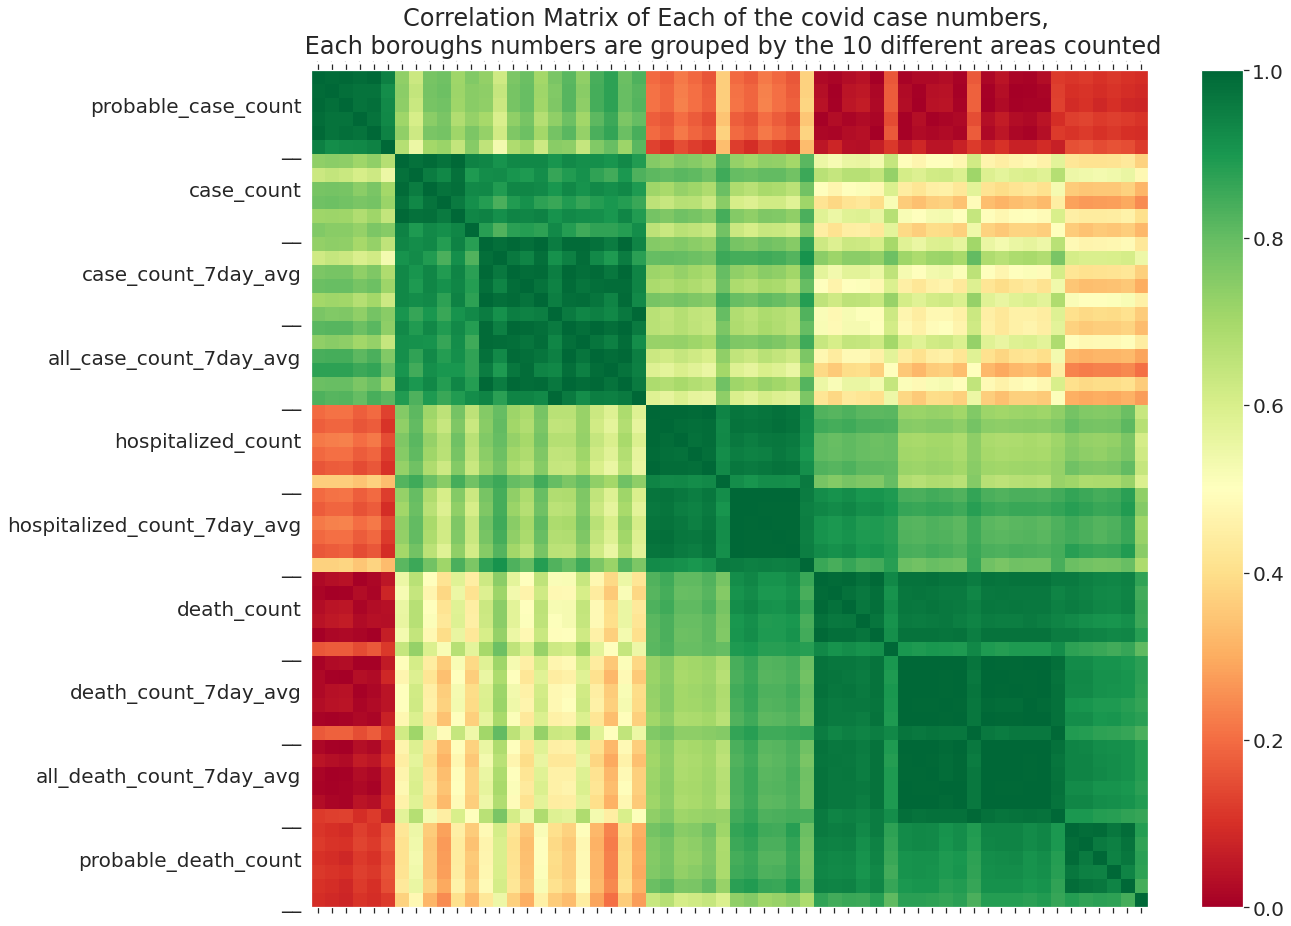

In [49]:
dft.columns


Index(['Unnamed: 0', 'day_year', 'day_week', 'week', 'borough', 'fhv',
       '2019_night', '2019_morn', '2019_arvo', '2019_even', '2020_night',
       '2020_morn', '2020_arvo', '2020_even', 'borough_case_count',
       'borough_probable_case_count', 'borough_hospitalized_count',
       'borough_death_count', 'borough_probable_death_count',
       'borough_case_count_7day_avg', 'borough_all_case_count_7day_avg',
       'borough_hospitalized_count_7day_avg', 'borough_death_count_7day_avg',
       'borough_all_death_count_7day_avg', 'stadium_capcity', 'restaurants',
       'high_schools', 'indoor_religious', 'phase_1'],
      dtype='object')

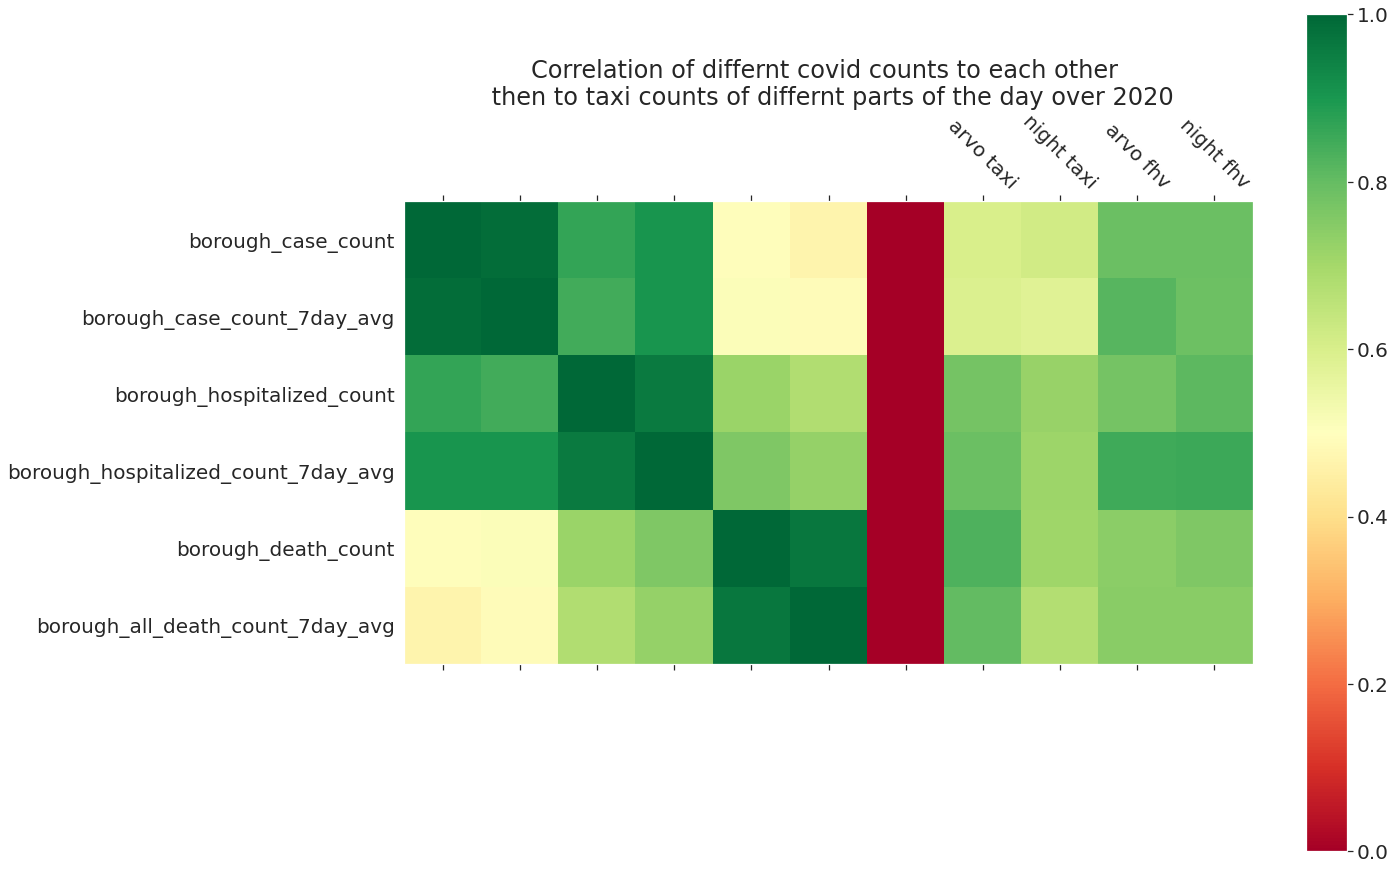

In [50]:
#extracts just the queens data
dft = df.loc[(df["borough"] == 3)]

#covid count columns in special order
covid_cols = [
    'borough_case_count', 
    'borough_case_count_7day_avg', 
    'borough_hospitalized_count', 
    'borough_hospitalized_count_7day_avg',
    'borough_death_count', 
    'borough_all_death_count_7day_avg']




#adds time of day of interest to array
val_cols = ['2020_arvo','2020_night']
val_cols.extend(covid_cols)

#pivots data to extract the right values for plotting
dfs = dft.pivot(
    index = 'day_year', 
    columns = ['fhv'], 
    values = val_cols
)

#find correlation between covid cols and times of interest
dfs = dfs.corr()[['2020_arvo','2020_night']].drop(['2020_arvo','2020_night']).abs()

#creates one df to be just the fhvs correlations
df1 = dfs.drop(0,level="fhv").drop(0,level="fhv",axis = 1)
df1.index = df1.index.droplevel(1)
df1.columns = df1.columns.droplevel(1)

#creates another df to be just the taxis correlations
df2 = dfs.drop(1,level="fhv").drop(1,level="fhv",axis = 1)
df2.index = df2.index.droplevel(1)
df2.columns = df2.columns.droplevel(1)

#combines the data frames together
dfs = pd.concat([df1, df2], axis=1, join='inner')
dfs1 = dfs

#get inter correlation of covid count columns
dfs2 = dft[covid_cols].corr().abs()

#adds a spacing column
dfs2['space'] = pd.Series(len(covid_cols)*[0], index=dfs2.index)

#creates x labels for times of interest 
x_labs = dfs.columns
x_labs = [x_labs[x].split("_")[1] + " " + ["taxi","fhv"][x//2] for x in range(0,4)]
x_names = (len(covid_cols) + 1)*[""]
x_names.extend(x_labs)

#combines the two correlation df into one
dfs = pd.concat([dfs2, dfs1], axis=1, join='inner')

#creates figure
f = plt.figure(figsize=(19, 15))

#plots heat map of correlation
plt.matshow(dfs, fignum=f.number, vmin = 0, vmax = 1, cmap = "RdYlGn")

#sets x and y ticks and labels
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), x_names, fontsize=20, rotation=-45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=20)

#adds colour bar
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)

#adds a title
plt.title('Correlation of differnt covid counts to each other \
\n then to taxi counts of differnt parts of the day over 2020', fontsize=24);

In [53]:
#the following two formulas were found at
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# formula is covered in stats
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


# quote from the page
# "Mathematically, it is defined as the weighted variance of the mean of each category divided 
# by the variance of all samples"
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta


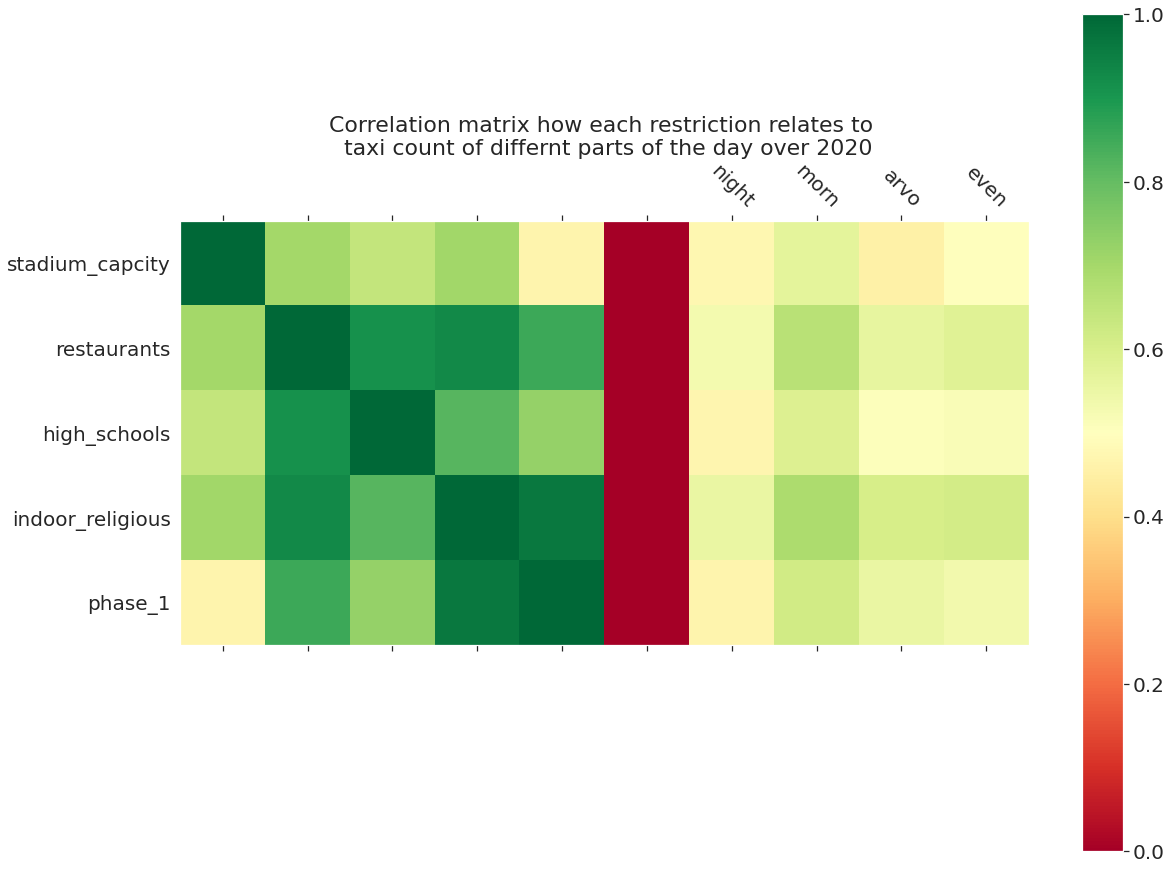

In [54]:
#only analysising fhv in queens
dft = df.loc[(df["borough"] == 3) & (df["fhv"] == 1)]

#name of covid columns
covid_cols = ["stadium_capcity", "restaurants", "high_schools", "indoor_religious" , "phase_1"]

#temp array to combine covid cols and taxi cols
column_temp1 = covid_cols.copy()
column_temp1.extend(taxi_cols_2020)

#finds correlation to taxi columns
dfs1 = dft[column_temp1].corr(method=correlation_ratio).drop(taxi_cols_2020)[taxi_cols_2020].abs()#[covid_cols, day_parts_2020]

#finds correlation to covid columns
dfs2 = dft[covid_cols].corr(method=cramers_v).abs()

#adds in a spacer column
dfs2['space'] = pd.Series(len(covid_cols)*[0], index = dfs2.index)

#concatinates the data frames
dfs = pd.concat([dfs2, dfs1], axis=1, join='inner')

#creates figure
f = plt.figure(figsize=(19, 15))

#plots heat map of correlation
plt.matshow(dfs, fignum=f.number, vmin = 0, vmax = 1, cmap = "RdYlGn")

#creates x axis labels to only be taxi columns
x_names = (len(covid_cols) + 1)*[""]
x_names.extend([x.split("_")[1] for x in taxi_cols_2020])

#sets x and y ticks and labels
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), x_names, fontsize=20, rotation=-45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=20)

#adds colour bar
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)

#adds a title
plt.title('Correlation matrix how each restriction relates to \
\n taxi count of differnt parts of the day over 2020', fontsize=22);

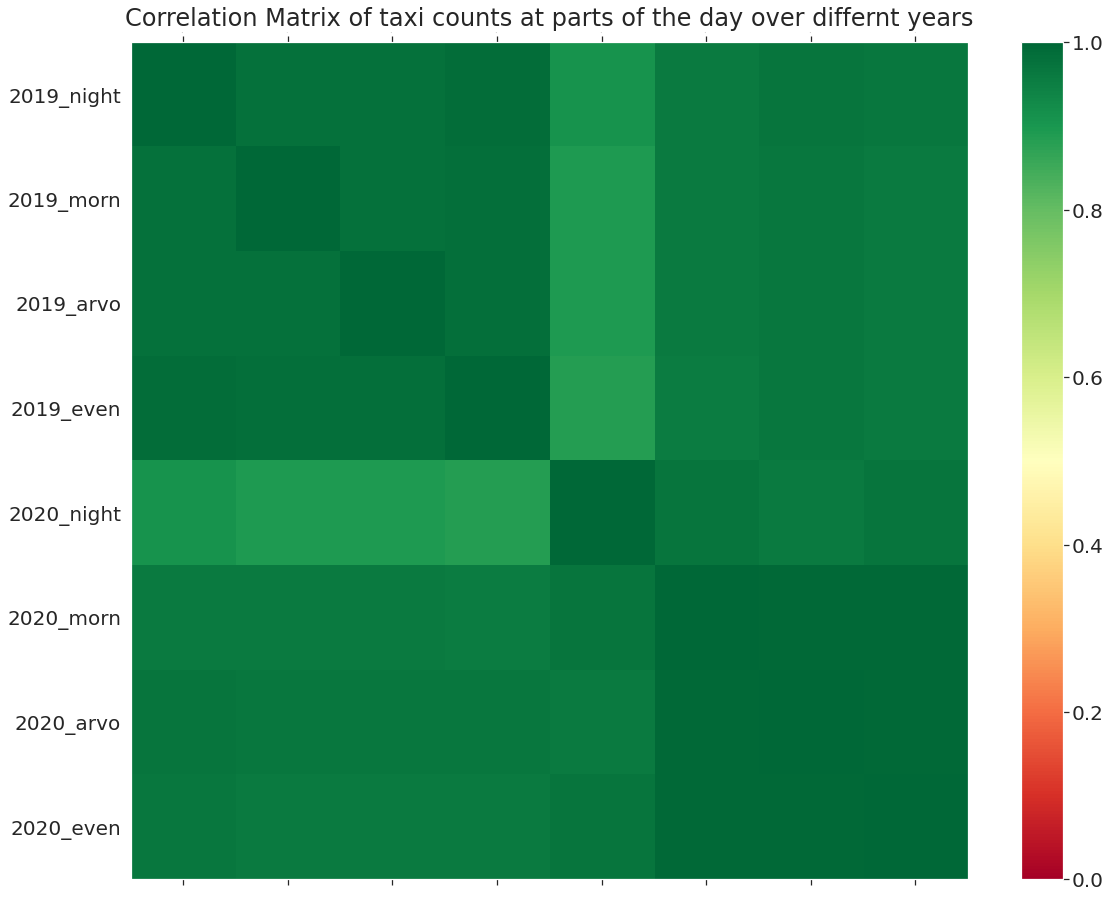

In [45]:
dfs = df[all_taxi_cols]

cor_matrix = dfs.corr().abs()
#creates figure
#plots heat map of correlation
#sets x and y ticks and labels
#adds colour bar
#adds a title
f = plt.figure(figsize=(19, 15))
plt.matshow(cor_matrix, fignum=f.number,vmin = 0, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), all_taxi_cols, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix of taxi counts at parts of the day over differnt years', fontsize=24);


#one from first 2, one from next 6, one from next 8 and one from last 4



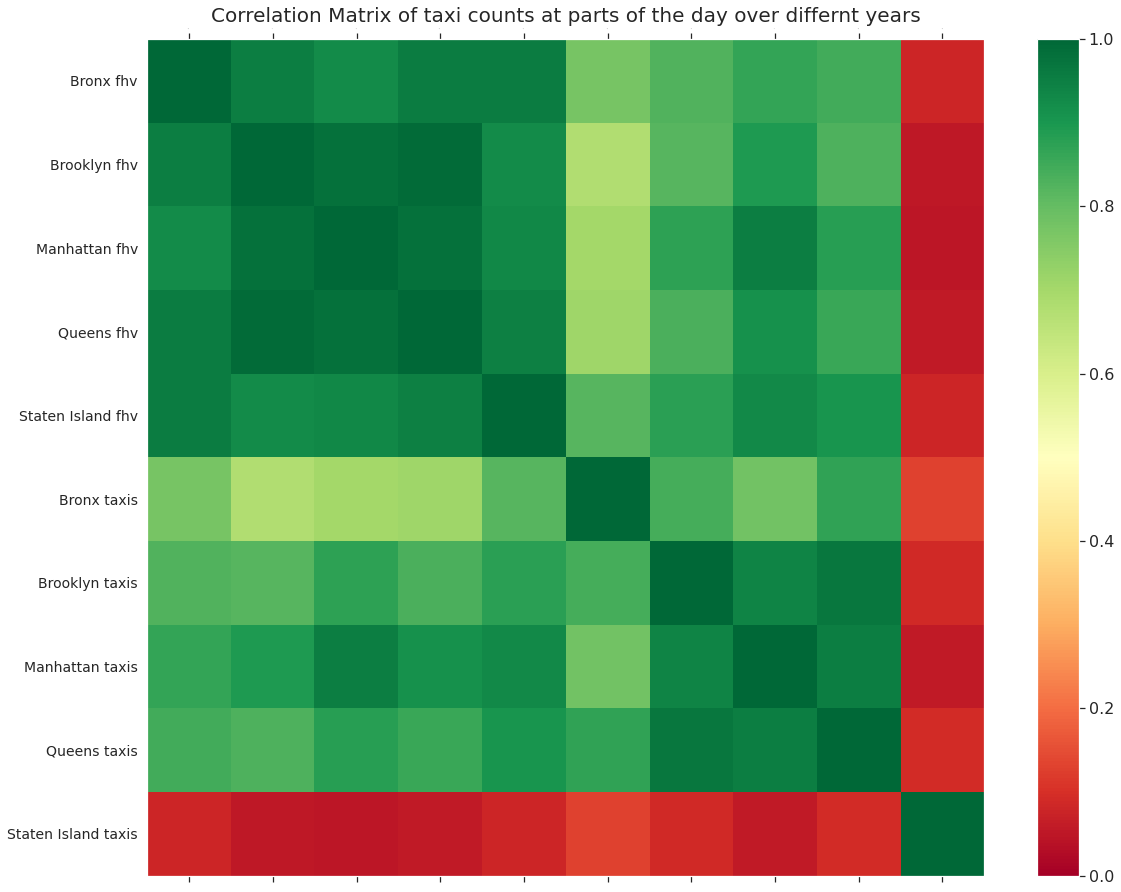

In [44]:
#chosen taxi column to analize
taxi_col = "2020_arvo"

#pivots main data frame to get relavent data
dfs = df.pivot(
    index = 'day_year', 
    columns = ['fhv', 'borough'], 
    values = taxi_col)

#rearranges the df so grouped by taxi type
dfs = pd.concat([dfs[1],dfs[0]], axis=1, join='inner')

#creates y labels
y_labels = [x + " fhv" for x in boroughs]
y_labels.extend([x + " taxis" for x in boroughs])

#finds correlation matrix
cor_matrix = dfs.corr().abs()

#creates figure
f = plt.figure(figsize=(19, 15))

#plots heat map of correlation
plt.matshow(cor_matrix, fignum=f.number, vmin = 0, vmax = 1, cmap = "RdYlGn")

#sets x and y ticks and labels
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), y_labels, fontsize=14)

#adds colour bar
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)

#adds a title
plt.title('Correlation Matrix of taxi counts at parts of the day over differnt years', fontsize=20);


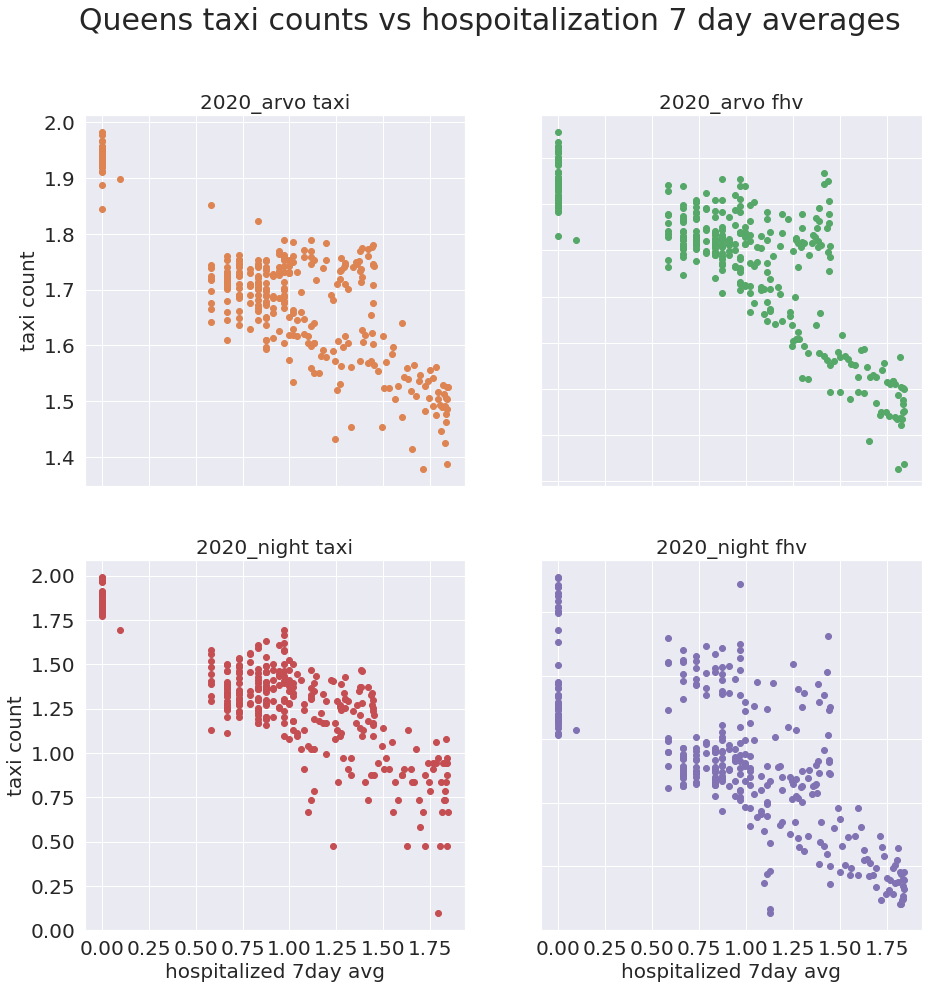

In [43]:
#pivots data to extract the right values for plotting
dfs = df[df["borough"] == 3].pivot(
    index = 'day_year', 
    columns = ['fhv'], 
    values = ['2020_arvo','2020_night', 'borough_hospitalized_count_7day_avg']
)

#creates 4 sub plots
fig, axs = plt.subplots(2, 2)

fig.suptitle("Queens taxi counts vs hospoitalization 7 day averages", fontsize = 30)


#for each combo of taxi/ fhv and arvo/ night
for fhv in [0, 1]:
    for part_of_day_index in [0,1]:
        
        #turns the index into a string, index is also needed for graphing
        part_of_day = ['2020_arvo','2020_night'][part_of_day_index]
        
        #y values are the taxi counts
        y = dfs[part_of_day][fhv]
        
        #x values are the hospitlization counts
        x = dfs['borough_hospitalized_count_7day_avg'][fhv]
        
        #adds grid back
        axs[part_of_day_index, fhv].grid(True)
        
        #creates a scatter subplot
        axs[part_of_day_index, fhv].scatter(
            x, y, 
            color = ("C" +  str((1 + fhv + 2 * part_of_day_index))    #gives an individual colour
            ))
        
        #labels the graph
        axs[part_of_day_index, fhv].set_title(part_of_day + " " + ['taxi','fhv'][fhv], fontsize=20)

        
#labels the graph as a whole
for ax in axs.flat:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.set(ylabel='taxi count', xlabel='hospitalized 7day avg')
    ax.label_outer()




<AxesSubplot:>

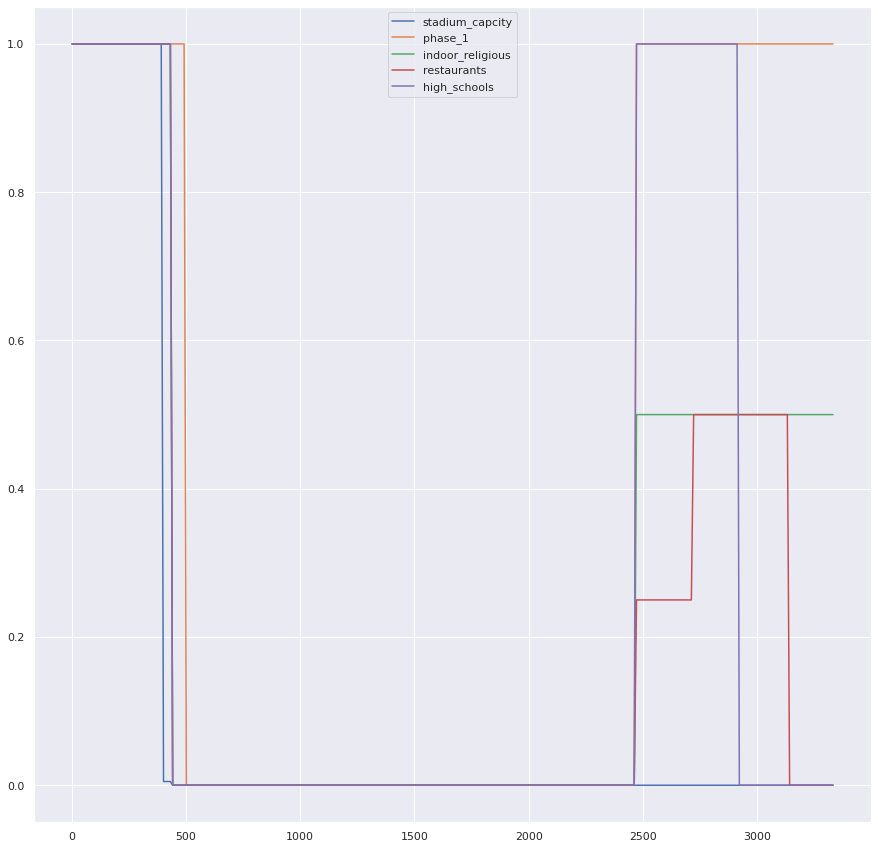

In [15]:
fig, ax = plt.subplots()
#xticks = (dft["week"]*(366/52) + dft["day"])
#lns1 = ax.plot(xticks, dft[["2020_morn"]], color = 'green', label = "2020_morn")


dft[covid_cols].plot(ax = ax)


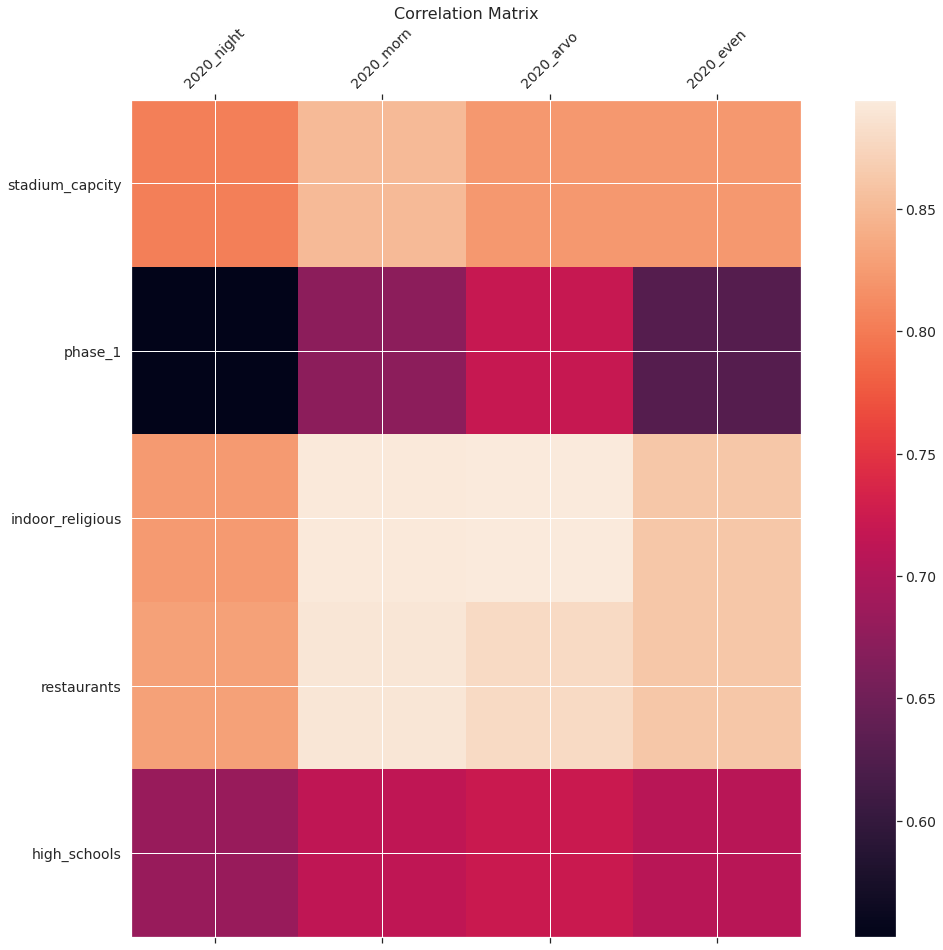

In [16]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr(method=correlation_ratio).drop(day_parts_2020)[day_parts_2020].abs()#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#curfew if its needed
#its useless? tiny increase to 2020_night but nothing much

#one from top 3-4
#all quite good
#taking stadium_capcity

#one from next 2-3
#clearly restaurants

#one of the schools
#none very relavent

#one of construct - gath
#indoor religious seems to be slighlty better

#or one of construct to large capacity public
#all pretty much the same keep phase_1

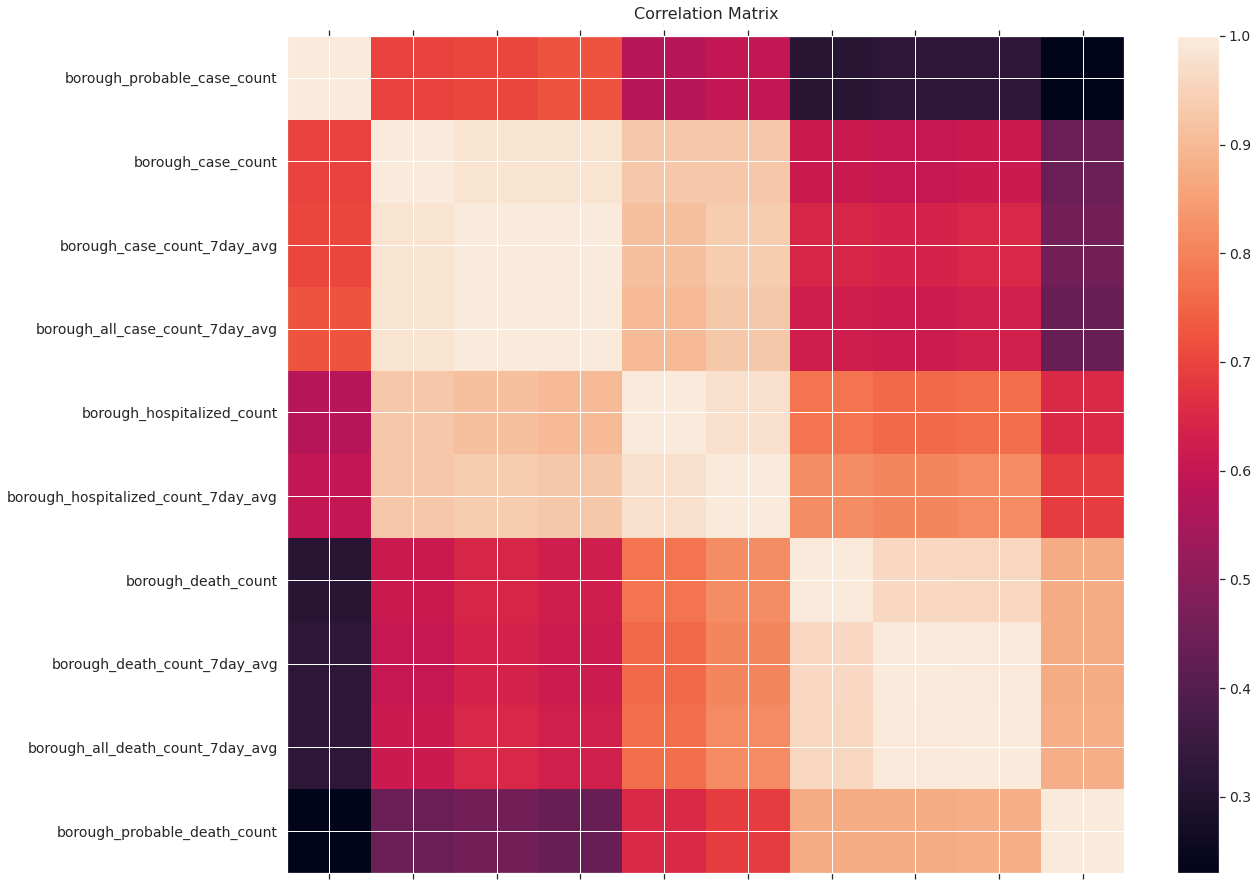

In [17]:
covid_cols = [

            'borough_probable_case_count',
    
            'borough_case_count', 
            'borough_case_count_7day_avg',
            'borough_all_case_count_7day_avg', 
    
            'borough_hospitalized_count', 
            'borough_hospitalized_count_7day_avg',
    
            'borough_death_count', 
            'borough_death_count_7day_avg', 
            'borough_all_death_count_7day_avg',
    
            'borough_probable_death_count',
]

dfs = dft[covid_cols]




f = plt.figure(figsize=(19, 15))
plt.matshow(dfs.corr(), fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#first 1
#next 3
#next 2
#next 3
#next 1

In [18]:
#correlation between taxi numbers in different boroughs
dfs.index

Int64Index([   2,   12,   22,   32,   42,   52,   62,   72,   82,   92,
            ...
            3242, 3252, 3262, 3272, 3282, 3292, 3302, 3312, 3322, 3332],
           dtype='int64', length=334)

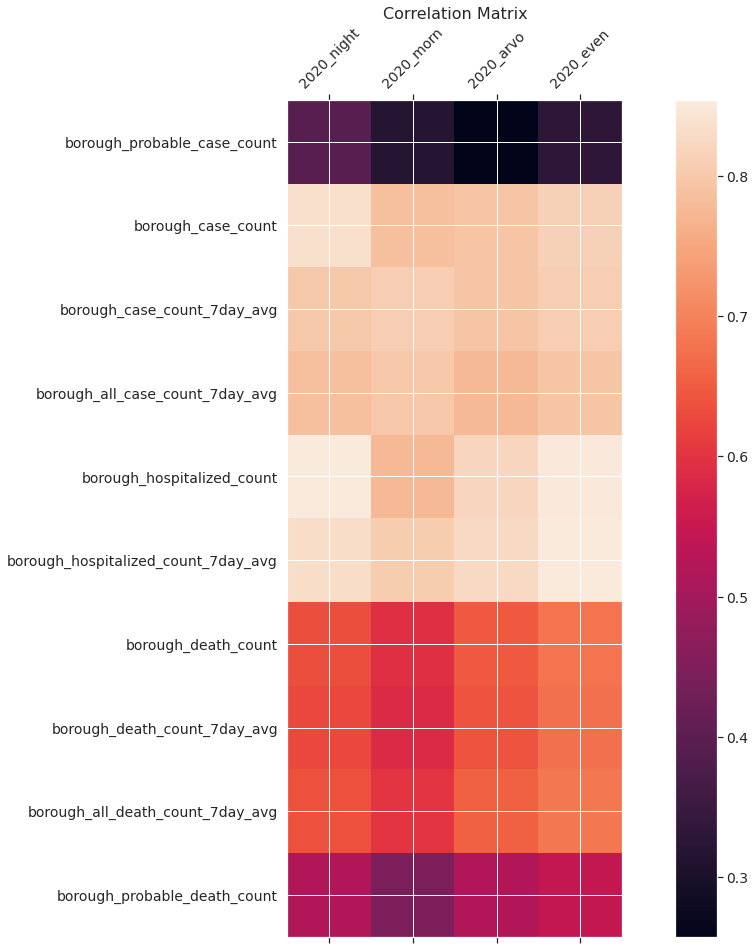

In [19]:
day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr().drop(day_parts_2020)[day_parts_2020].abs()#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#one from first 2, 
#niether both no correlation

#one from next 6, 
#borough_Case_count + 7day average
#compare it next

#one from next 4
#borough_hospitilaztion_count + 

#one from last 8



#first 1, no
#next 3, borough_all_Case_count + 7day average
#next 2, borough_hospitilaztion_count + 7day avg
#next 3, borough_death_count + 7day average
#next 1, no

In [20]:
max_corr_delta = 0
max_corr = 0
max_corr_index = dfs.unstack().sort_values(ascending=False).index[0]
max_corr = dfs.unstack().sort_values(ascending=False)[0]

min_day_delta = -30
max_day_delta = 100
taxi_counts = dft[max_corr_index[0]]
covid_day0 = covid_cases["date_of_interest"][0]
day0 = dft["day_year"].values[0]

max_corr_index_use = [0,0]
if(max_corr_index[1].startswith('borough')):
    max_corr_index_use[0] = max_corr_index[0]
    max_corr_index_use[1] = "mn"+max_corr_index[1].split('borough')[1]
else:
    max_corr_index_use[0] = max_corr_index[0]
    max_corr_index_use[1] = max_corr_index[1].split('total_')[1]

    
    

for day_delta in range(min_day_delta, max_day_delta):
    
    values = []
    
    datetime0 = datetime.datetime.strptime( " ".join( [str(int) for int in [day0, covid_started[1]]]) ,"%j %Y" ) + datetime.timedelta(day_delta)
    #dft["day"].values
    
    for day_increment in range(0,len(dft)):
        day = datetime0 + datetime.timedelta(day_increment)

            
        val = covid_cases.loc[covid_cases['date_of_interest'] == day][max_corr_index_use[1]].values
        
        if(val.any()):
            values.append(val[0])
        else:
            values.append(0)
    r, p = pearsonr(values, taxi_counts)
    
    print(abs(r))
    
    if(abs(r) > max_corr):
        print("new high with " + str(max_corr))
        max_corr_delta = day_delta
        max_corr = abs(r)
    print(day_delta)

print(max_corr)
print(max_corr_delta)

0.47439314436603774
-30
0.47985172946303967
-29
0.48486355354131544
-28
0.4900985177937868
-27
0.4952906160064101
-26
0.5001915454246915
-25
0.5047845319358374
-24
0.5090680126894954
-23
0.513005580505926
-22
0.5164910502804397
-21
0.5204340543714554
-20
0.5240266234415267
-19
0.5269802156134784
-18
0.5297571290440156
-17
0.5328809418536141
-16
0.5350790656205229
-15
0.536548408680834
-14
0.5378499412343605
-13
0.5388623935165443
-12
0.5393704570268041
-11
0.5390930690214506
-10
0.5383566049292845
-9
0.5368890415976078
-8
0.5348352915631652
-7
0.5323868864366326
-6
0.5288820895671127
-5
0.5245467226750222
-4
0.5187831653951287
-3
0.5119829467708134
-2
0.5036151147533613
-1
0.49346309805976657
0
0.4817235108023113
1
0.4681947417358459
2
0.45173188769207717
3
0.43317093268678597
4
0.4124642964581033
5
0.3890441271063175
6
0.3630973678494861
7
0.33447302250316324
8
0.3038401923404721
9
0.27052095880475074
10
0.2348881377814621
11
0.19722518132115893
12
0.15797244065185748
13
0.11734138681

In [21]:
print(max_corr_delta)
print(max_corr_index_use)


0
['2020_even', 'mn_hospitalized_count_7day_avg']


In [22]:
datetime0 = day0

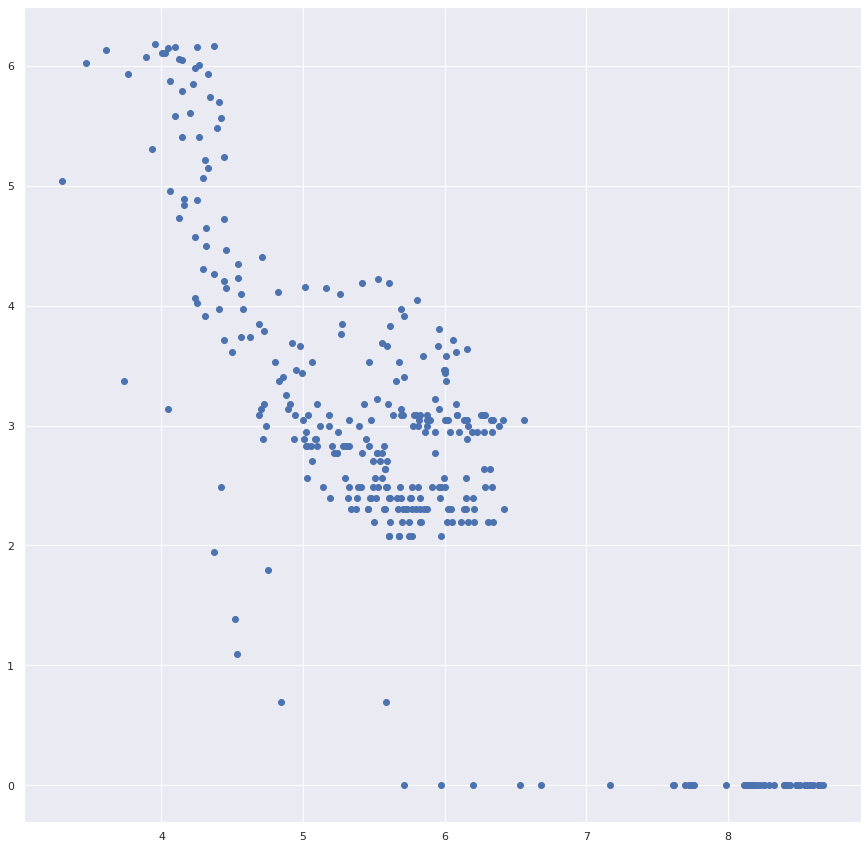

In [23]:
# Fixing random state for reproducibility
np.random.seed(19680801)

#N = 50
x = dft[max_corr_index[0]]
y = dft[max_corr_index[1]]
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y)#, c=colors, alpha=0.5)
plt.show()

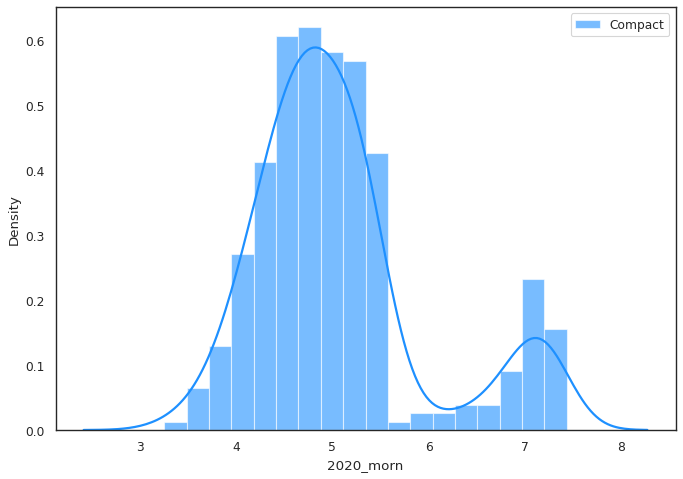

In [24]:
import seaborn as sns
sns.set_style("white")

# Import data
x1 = dft["2020_morn"]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
#plt.xlim(50,75)
plt.legend();

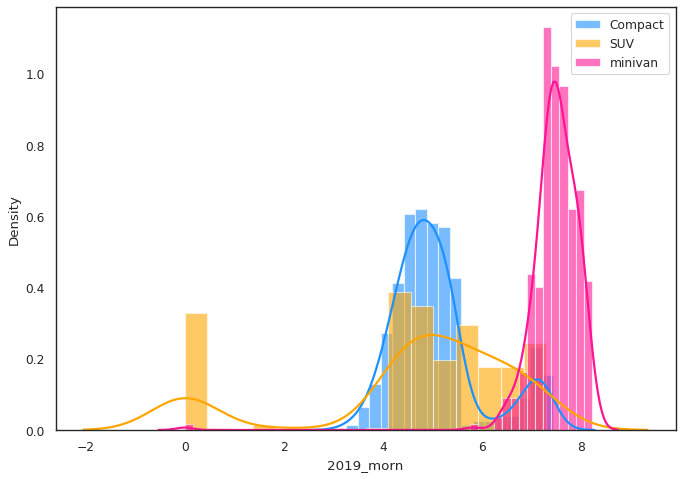

In [25]:
import seaborn as sns
sns.set_style("white")

# Import data
x1 = dft["2020_morn"]
x2 = dft["borough_all_case_count_7day_avg"]
x3 = dft["2019_morn"]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
sns.distplot(x2, color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
#plt.xlim(50,75)
plt.legend();

KeyError: "None of [Index(['total_all_case_count_7day_avg', 'total_hospitalized_count_7day_avg',\n       'total_all_death_count_7day_avg'],\n      dtype='object')] are in the [columns]"

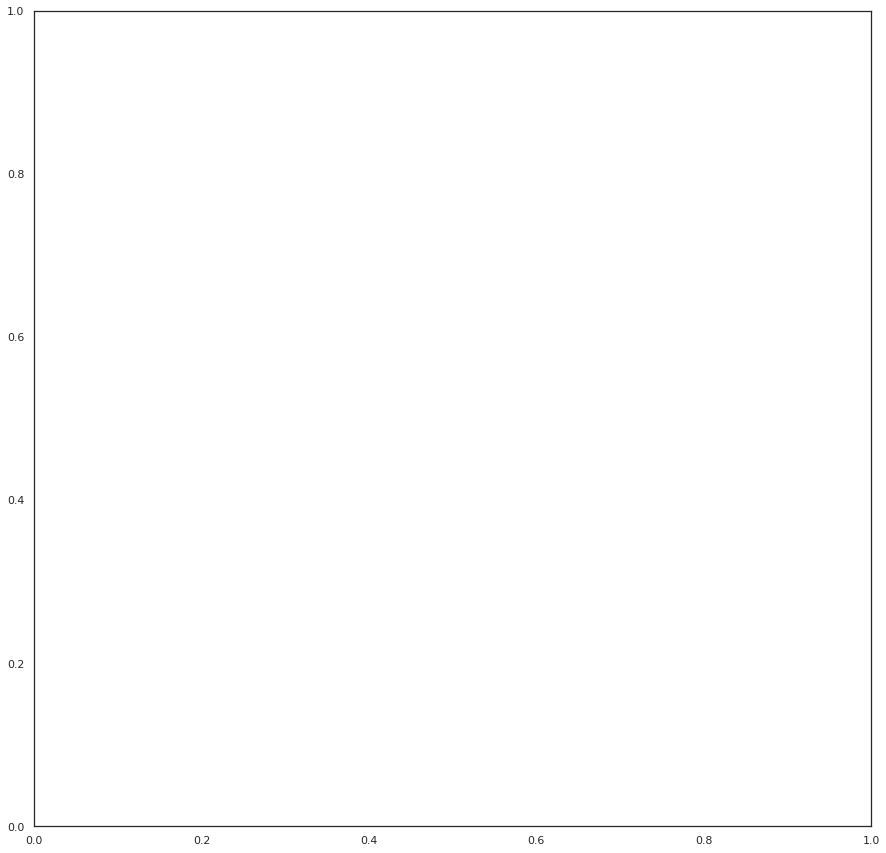

In [26]:
fig, ax = plt.subplots()
#xticks = (dft["week"]*(366/52) + dft["day"])
#lns1 = ax.plot(xticks, dft[["2020_morn"]], color = 'green', label = "2020_morn")


dft[[
     'total_all_case_count_7day_avg', 
     'total_hospitalized_count_7day_avg',
     'total_all_death_count_7day_avg',
]].plot(ax = ax)


ax.set_yscale('log')

fig2, ax2 = plt.subplots()
dft[[
     'borough_all_case_count_7day_avg', 
     'borough_hospitalized_count_7day_avg',
     'borough_all_death_count_7day_avg'
        ]].plot(ax = ax2)
ax2.set_yscale('log')





In [ ]:
dft

In [ ]:
df[["2020_morn","borough_case_count"]].plot(subplots=True)

In [ ]:
def compare_these_cols(graphing_cols):
    fig, ax = plt.subplots()
    xticks = (dft["day_year"])
    
    ax.set_xticklabels = xticks
    ax.set_xticks = xticks
    
    lns1 = ax.plot(xticks, dft[[graphing_cols[0]]], color = 'green', label = graphing_cols[0])
    ax.tick_params(axis='y', labelcolor='green')
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(xticks, dft[[graphing_cols[1]]], color = 'blue', label = graphing_cols[1])
    ax2.tick_params(axis='y', labelcolor='blue')
    
    lns = lns1 + lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)

In [ ]:
compare_these_cols(["2020_morn","borough_case_count"])

In [ ]:
compare_these_cols(["2020_morn","2019_morn"])


In [ ]:
compare_these_cols(["2020_night","2019_night"])

In [ ]:
compare_these_cols(["2020_night",'restaurants'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
data = np.clip(randn(250,250),-1,1)
data = np.ma.masked_where(data > 0.5, data)


fig, ax1 = plt.subplots(1,1)

im = ax1.imshow(data, interpolation='nearest')
cb = plt.colorbar(im)

fg_color = 'white'
bg_color = 'black'

# IMSHOW    
# set title plus title color
ax1.set_title('ax1 title', color=fg_color)

# set figure facecolor
ax1.patch.set_facecolor(bg_color)

# set tick and ticklabel color
im.axes.tick_params(color=fg_color, labelcolor=fg_color)

# set imshow outline
for spine in im.axes.spines.values():
    spine.set_edgecolor(fg_color)    

# COLORBAR
# set colorbar label plus label color
cb.set_label('colorbar label', color=fg_color, fontsize=24)
cb.ax.tick_params(labelsize=24)
# set colorbar tick color
cb.ax.yaxis.set_tick_params(color=fg_color)

# set colorbar edgecolor 
cb.outline.set_edgecolor(fg_color)

# set colorbar ticklabels
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)

fig.patch.set_facecolor(bg_color)    
plt.tight_layout()
plt.show()
#plt.savefig('save/to/pic.png', dpi=200, facecolor=bg_color)